### GOLD PRICE ANALYSIS



---



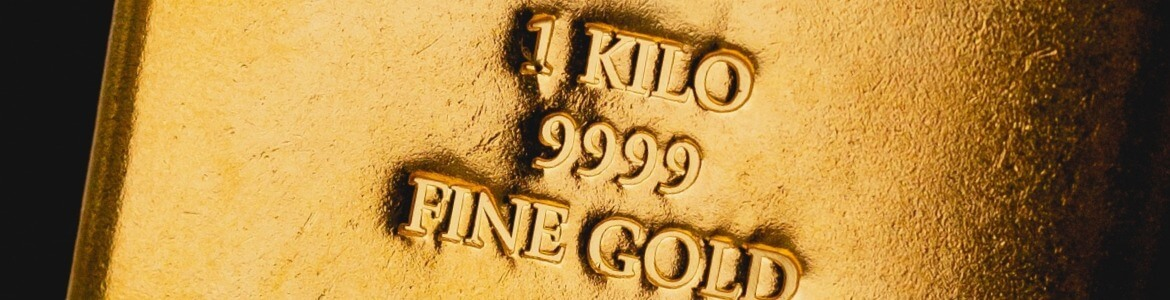



---



## Introduction

Data Analysis on the variation in the price of gold between the years 2008 and 2018.

Data consists of various GLD (gold) prices:



*   SPX - The Standard and Poor's 500, or simply the S&P 500, is a stock market index tracking the performance of 500 large companies listed on stock exchanges in the United States.
*   GLD - SPDR Gold Shares is part of the SPDR family of exchange-traded funds (ETF) managed and marketed by State Street Global Advisors.
*   USO - The United States Oil Fund ® LP (USO) is an exchange-traded security whose shares may be purchased and sold on the NYSE Arca.
*   SLV - The iShares Silver Trust (SLV) is an exchange traded fund (ETF) that tracks the price performance of the underlying holdings in the LMBA Silver Price.
*   EUR/USD - The Currency Pair EUR/USD is the shortened term for the euro against U.S. dollar pair, or cross for the currencies of the European Union (EU) and the United States (USD). The value of the EUR/USD pair is quoted as 1 euro per x U.S. dollars. For example, if the pair is trading at 1.50, it means it takes 1.5 U.S. dollars to buy 1 euro.







## 1. Importing Libraries





In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid", {"grid.color": ".6",
                           "grid.linestyle": ":"})

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

## 2. Loading the Dataset  

In [3]:
# read dataset using pndas function
# use parse_dates argument to change datetime dtype
dataset = pd.read_csv("/content/gold_price_data.csv",
                      parse_dates=["Date"])

In [4]:
# information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2290 non-null   datetime64[ns]
 1   SPX      2290 non-null   float64       
 2   GLD      2290 non-null   float64       
 3   USO      2290 non-null   float64       
 4   SLV      2290 non-null   float64       
 5   EUR/USD  2290 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 107.5 KB


## 3. Data preprocessing

In [5]:
# Missing Values/Null Values Count
dataset.isna().sum().sort_values(ascending=False)

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

## 4. Correlation Between Columns

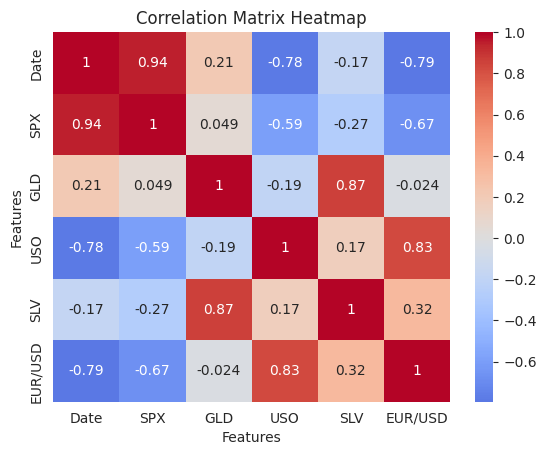

In [6]:
# Calculate correlation matrix
correlation  = dataset.corr()

# Create heatmap
sns.heatmap(correlation, cmap='coolwarm',
            center=0, annot=True)

# Set title and axis labels
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')

# Show plot
plt.show()

In [7]:
# drop SlV column
dataset.drop("SLV", axis=1,
             inplace=True)

## 5. Data Wrangling

In [8]:
# reset the index to date column
dataset.set_index("Date", inplace=True)

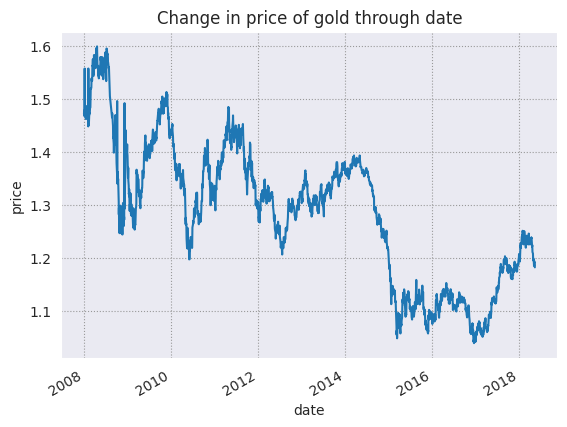

In [9]:
# plot price of gold for each increasing day
dataset["EUR/USD"].plot()
plt.title("Change in price of gold through date")
plt.xlabel("date")
plt.ylabel("price")v
plt.show()

### Trend in Gold Prices Using Moving Averages

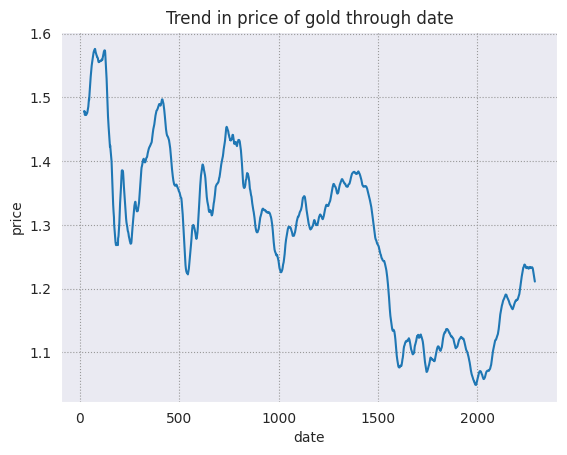

In [10]:
# apply rolling mean with window size of 3
dataset["price_trend"] = dataset["EUR/USD"]\
    .rolling(window=20).mean()

# reset the index to date column
dataset.reset_index("Date", inplace=True)

# since we have used rolling method
# for 20 rows first 2 rows will be NAN
dataset["price_trend"].loc[20:].plot()

# set title of the chart
plt.title("Trend in price of gold through date")

# set x_label of the plot
plt.xlabel("date")
plt.ylabel("price")
plt.show()

### Distribution  of Columns

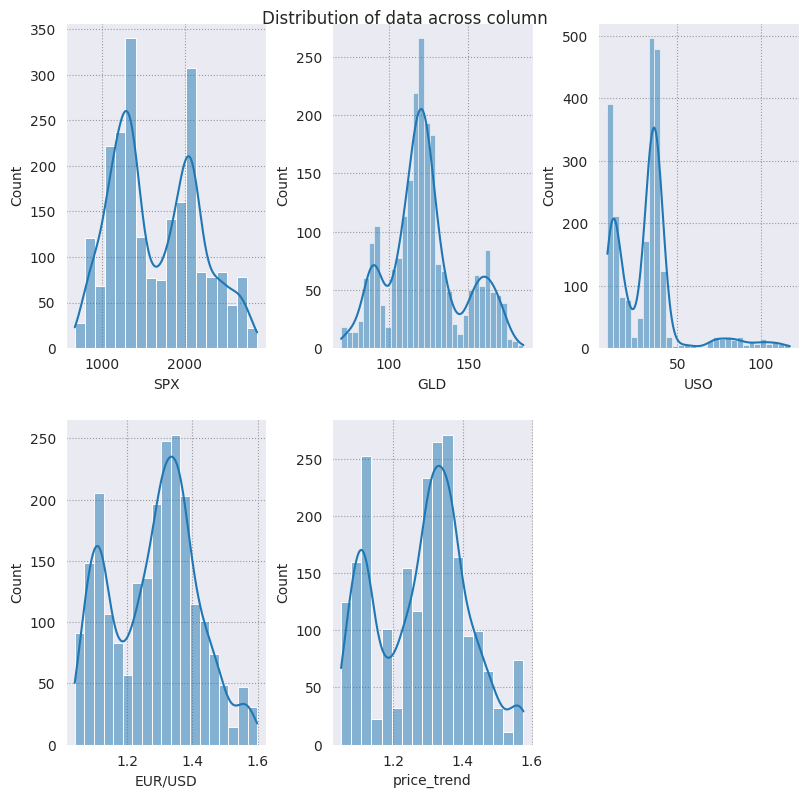

In [11]:
fig = plt.figure(figsize=(8, 8))

# suptitle of the graph
fig.suptitle('Distribution of data across column')
temp = dataset.drop("Date", axis=1).columns.tolist()
for i, item in enumerate(temp):
    plt.subplot(2, 3, i+1)
    sns.histplot(data=dataset, x=item, kde=True)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.show()

In [13]:
# apply saquare root transformation
# on the skewed dataset
dataset["USO"] = dataset["USO"]\
    .apply(lambda x: np.sqrt(x))

## 6. Handling Outliers

### Plotting Boxplot to Visualize the Outliers

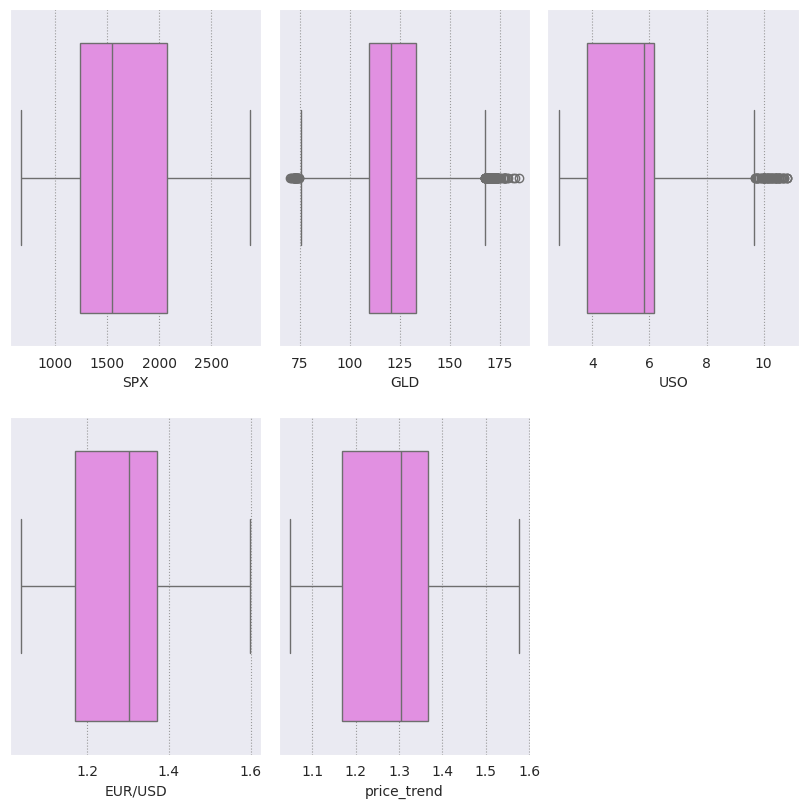

In [14]:
fig = plt.figure(figsize=(8, 8))
temp = dataset.drop("Date", axis=1).columns.tolist()
for i, item in enumerate(temp):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=dataset, x=item, color='violet')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.show()